<a href="https://colab.research.google.com/github/nguyetmle/voting-distortion/blob/main/Voting_Distortion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:

from VoteRules3D import VoteResult3D
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style




In [21]:
def simulate(numTest,n,m,dimension):
    dict = {"n":[], "m":[], "Dimension":[], "Plurality":[], "Plurality Majority Criterion":[],
    "Copeland":[], "Copeland Majority Criterion":[], "STV":[], "STV Majority Criterion":[],
    "Borda":[], "Borda Majority Criterion":[], "STAR":[], "STAR Majority Criterion":[], "Plurality Veto": [], "Plurality Veto Majority Criterion": []}
    for i in range(numTest):
        test = VoteResult3D(n, m, dimension)
        dict["n"].append(n)
        dict["m"].append(m)
        dict["Dimension"].append(test.dimension)
        

        #winners 
        plurality = test.plurality()
        copeland = test.copeland()
        stv = test.STV()
        borda = test.borda()
        star = test.STAR()
        veto = test.pluralityVeto()
        dict["Plurality"].append(plurality)
        dict["Copeland"].append(copeland)
        dict["STV"].append(stv)
        dict["Borda"].append(borda)
        dict["STAR"].append(star)
        dict["Plurality Veto"].append(veto)

        dict["Plurality Majority Criterion"].append(test.majorityCheck(plurality))
        dict["Copeland Majority Criterion"].append(test.majorityCheck(copeland))
        dict["STV Majority Criterion"].append(test.majorityCheck(stv))
        dict["Borda Majority Criterion"].append(test.majorityCheck(borda))
        dict["STAR Majority Criterion"].append(test.majorityCheck(star))
        dict["Plurality Veto Majority Criterion"].append(test.majorityCheck(veto))
        

        
    df = pd.DataFrame(dict)
    df.to_csv('majorityCheck3D.csv', mode="a", header = None)

# Now you have a DataFrame df with the results of your simulations


In [22]:
dimensions = ["1D", "2D", "3D"]
m_array = [5, 10, 25, 50, 100]
n=200

for d in dimensions:
        for m in m_array:
            simulate(1000,n, m, d)

KeyboardInterrupt: 

In [23]:
main = pd.read_csv("majorityCheck.csv")

main.head(10)

,index,n,m,Dimension,Plurality,Plurality Majority Criterion,Copeland,Copeland Majority Criterion,STV,STV Majority Criterion,Borda,Borda Majority Criterion,STAR,STAR Majority Criterion,Plurality Veto,Plurality Veto Majority Criterion
0,0,200,2,1D,Candidate 0,True,Candidate 0,True,Candidate 0,True,Candidate 0,True,Candidate 0,True,Candidate 0,True
1,1,200,2,1D,Candidate 0,True,Candidate 0,True,Candidate 0,True,Candidate 0,True,Candidate 0,True,Candidate 0,True
2,2,200,2,1D,Candidate 1,True,Candidate 1,True,Candidate 1,True,Candidate 1,True,Candidate 1,True,Candidate 1,True
3,3,200,2,1D,Candidate 0,True,Candidate 0,True,Candidate 0,True,Candidate 0,True,Candidate 0,True,Candidate 0,True
4,4,200,2,1D,Candidate 1,True,Candidate 1,True,Candidate 1,True,Candidate 1,True,Candidate 1,True,Candidate 1,True
5,5,200,2,1D,Candidate 1,True,Candidate 1,True,Candidate 1,True,Candidate 1,True,Candidate 1,True,Candidate 1,True
6,6,200,2,1D,Candidate 0,True,Candidate 0,True,Candidate 0,True,Candidate 0,True,Candidate 0,True,Candidate 0,True
7,7,200,2,1D,Candidate 0,True,Candidate 0,True,Candidate 0,True,Candidate 0,True,Candidate 0,True,Candidate 0,True
8,8,200,2,1D,Candidate 0,True,Candidate 0,True,Candidate 0,True,Candidate 0,True,Candidate 0,True,Candidate 0,True
9,9,200,2,1D,Candidate 1,True,Candidate 1,True,Candidate 1,True,Candidate 1,True,Candidate 1,True,Candidate 1,True


In [24]:
# Assuming you have a DataFrame 'main' and a target value 'True'
target_value = True

# Group by 'Distribution' and calculate the percentage of each method choosing the OPT
majorityCheck = main.groupby("Dimension").agg(
    Plurality_percentage=('Plurality Majority Criterion', lambda x: (x == target_value).sum() / x.count() * 100),
    Copeland_percentage=('Copeland Majority Criterion', lambda x: (x == target_value).sum() / x.count() * 100),
    STV_percentage=('STV Majority Criterion', lambda x: (x == target_value).sum() / x.count() * 100),
    STAR_percentage=('STAR Majority Criterion', lambda x: (x == target_value).sum() / x.count() * 100),
    Borda_percentage=('Borda Majority Criterion', lambda x: (x == target_value).sum() / x.count() * 100),
    PluralityVeto_percentage=('Plurality Majority Criterion', lambda x: (x == target_value).sum() / x.count() * 100)
).reset_index()

majorityCheck


,Dimension,Plurality_percentage,Copeland_percentage,STV_percentage,STAR_percentage,Borda_percentage,PluralityVeto_percentage
0,1D,100.0,100.0,100.0,92.861322,90.286717,100.0
1,2D,100.0,100.0,100.0,76.454462,97.045385,100.0
2,3D,100.0,100.0,100.0,96.272401,98.431900,100.0


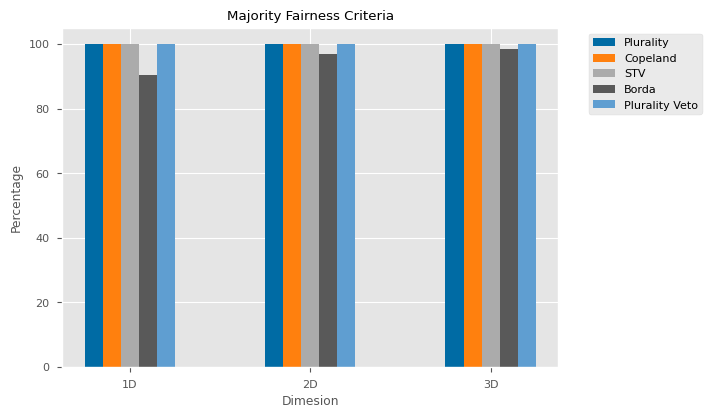

In [26]:
style.use("ggplot")
style.use("tableau-colorblind10")
style.use('seaborn-v0_8-paper')

# df = majorityCheck
# # List of columns you want to compare
# columns_to_compare = ["Plurality_percentage", "Copeland_percentage", "STV_percentage", "Borda_percentage", "PluralityVeto_percentage"]

# # Transpose the DataFrame
# df = df.set_index("Dimension")[columns_to_compare].T

# # Plotting
# ax = df.plot(kind="bar", figsize=(10, 6))
# plt.xlabel("Method")
# plt.ylabel("Percentage")
# plt.title("Majority Fairness Criteria")
# plt.legend(title="Dimension", loc="upper left", bbox_to_anchor=(1, 1))
# plt.tight_layout()
# plt.show()


dimension = majorityCheck.Dimension
plurality_percentage = majorityCheck["Plurality_percentage"]
copeland_percentage = majorityCheck["Copeland_percentage"]
stv_percentage = majorityCheck["STV_percentage"]
borda_percentage = majorityCheck["Borda_percentage"]
pluralityVeto_percentage = majorityCheck["PluralityVeto_percentage"]

# Set the width of each bar
bar_width = 0.1

# Define x-axis positions for the bars
x = np.arange(len(dimension))

# Create the bar plots for each dimension
plt.bar(x - 2 * bar_width, plurality_percentage, width=bar_width, label="Plurality")
plt.bar(x - bar_width, copeland_percentage, width=bar_width, label="Copeland")
plt.bar(x, stv_percentage, width=bar_width, label="STV")
plt.bar(x + bar_width, borda_percentage, width=bar_width, label="Borda")
# plt.bar(x + 2 * bar_width, star_max, width=bar_width, label="STAR")
plt.bar(x + 2 * bar_width, pluralityVeto_percentage, width=bar_width, label="Plurality Veto")


# Customize the plot
plt.xlabel("Dimesion")
plt.ylabel("Percentage")
plt.title("Majority Fairness Criteria")
plt.xticks(x, dimension)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()